In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top5000youtubechannels/top-5000-youtube-channels.csv


In [107]:
data= pd.read_csv('../input/top5000youtubechannels/top-5000-youtube-channels.csv', sep =',',encoding ='utf-8')

In [108]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


In [109]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [111]:
#Check Missing Values In The Dataset

data.isnull().sum()

pre_missing=data.isnull().sum()*100/len(data)
pre_missing


Rank             0.0
Grade            0.0
Channel name     0.0
Video Uploads    0.0
Subscribers      0.0
Video views      0.0
dtype: float64

In [112]:
#Check For Duplicate Data

dup=data.duplicated().any()
print("Any duplicate Value?",dup)

#drop the duplicated data
#data=data_drop.drop_duplicates()


Any duplicate Value? False


In [113]:
data.head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [114]:
#change data type of Video Uploads ,Subscribers
data['Subscribers'].dtype

dtype('O')

In [115]:
#data cleaning
data=data.replace('--',np.nan,regex=True)

#

In [116]:
data[data['Subscribers']=="--"]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views


In [117]:
data['Video Uploads'].dtype
data['Video Uploads'].astype('float')


0       82757.0
1       12661.0
2         373.0
3       27323.0
4       36756.0
         ...   
4995      706.0
4996      797.0
4997      110.0
4998     3475.0
4999      254.0
Name: Video Uploads, Length: 5000, dtype: float64

In [118]:
data[data['Video Uploads']=="--"]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views


In [119]:
#we will do the same .
#data cleaning
data=data.replace('--',np.nan,regex=True)
data[data['Video Uploads']=="--"]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views


In [120]:
#Drop All the Missing Values

data.dropna(how='any',inplace=True)


In [135]:
#Now we can change data type of Subscribers to flot
data['Subscribers']=data['Subscribers'].astype('float')
data['Video Uploads']=data['Video Uploads'].astype('float')

In [136]:
#we can make sure that Subscribers and Video Uploads are  float now.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4610 non-null   int64  
 1   Grade          4610 non-null   object 
 2   Grade_1        4610 non-null   int64  
 3   Channel name   4610 non-null   object 
 4   Video Uploads  4610 non-null   float64
 5   Subscribers    4610 non-null   float64
 6   Video views    4610 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 288.1+ KB


In [123]:
#Check Missing Values In The Dataset

data.isnull().sum()

pre_missing=data.isnull().sum()*100/len(data)
pre_missing


Rank             0.0
Grade            0.0
Channel name     0.0
Video Uploads    0.0
Subscribers      0.0
Video views      0.0
dtype: float64

In [124]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757.0,18752951.0,20869786591
1,2nd,A++,T-Series,12661.0,61196302.0,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4th,A++,SET India,27323.0,31180559.0,22675948293
4,5th,A++,WWE,36756.0,32852346.0,26273668433


In [125]:
#Data Cleaning [ Rank Column ] remove the last two letter 
data['Rank']=data['Rank'].str[0:-2]



In [126]:
#remove ","
data['Rank']=data['Rank'].str.replace(',','')

In [127]:
data.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,4996,B+,Uras Benlioğlu,706.0,2072942.0,441202795
4996,4997,B+,HI-TECH MUSIC LTD,797.0,1055091.0,377331722
4997,4998,B+,Mastersaint,110.0,3265735.0,311758426
4998,4999,B+,Bruce McIntosh,3475.0,32990.0,14563764
4999,5000,B+,SehatAQUA,254.0,21172.0,73312511


In [128]:

#change the data type to float
data['Rank']=data['Rank'].astype('int')


In [129]:
data['Rank'].dtype

dtype('int64')

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4610 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4610 non-null   int64  
 1   Grade          4610 non-null   object 
 2   Channel name   4610 non-null   object 
 3   Video Uploads  4610 non-null   float64
 4   Subscribers    4610 non-null   float64
 5   Video views    4610 non-null   int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 252.1+ KB


In [131]:
   data.head() 

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,Zee TV,82757.0,18752951.0,20869786591
1,2,A++,T-Series,12661.0,61196302.0,47548839843
2,3,A++,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4,A++,SET India,27323.0,31180559.0,22675948293
4,5,A++,WWE,36756.0,32852346.0,26273668433


In [132]:
#Data Cleaning [ Grade ]
data['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [133]:

x=data['Grade'].map({'A++ ':1,'A+ ':2,'A ':3,'A- ':4,'B+ ':5})
data.insert(2,'Grade_1',x)


In [134]:
data.head()

,Rank,Grade,Grade_1,Channel name,Video Uploads,Subscribers,Video views
0,1,A++,1,Zee TV,82757.0,18752951.0,20869786591
1,2,A++,1,T-Series,12661.0,61196302.0,47548839843
2,3,A++,1,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082
3,4,A++,1,SET India,27323.0,31180559.0,22675948293
4,5,A++,1,WWE,36756.0,32852346.0,26273668433


In [137]:
#Find Average Views For Each Channel

data['Video views_Avrage']=data['Video views']/data['Video Uploads']

In [138]:
data.head()

,Rank,Grade,Grade_1,Channel name,Video Uploads,Subscribers,Video views,Video views_Avrage
0,1,A++,1,Zee TV,82757.0,18752951.0,20869786591,2.521815e+05
1,2,A++,1,T-Series,12661.0,61196302.0,47548839843,3.755536e+06
2,3,A++,1,Cocomelon - Nursery Rhymes,373.0,19238251.0,9793305082,2.625551e+07
3,4,A++,1,SET India,27323.0,31180559.0,22675948293,8.299216e+05
4,5,A++,1,WWE,36756.0,32852346.0,26273668433,7.148130e+05


In [142]:
#Top Ten Channels With Maximum Number of Video Uploads
data.sort_values(by='Video Uploads',ascending=False).head(10)

,Rank,Grade,Grade_1,Channel name,Video Uploads,Subscribers,Video views,Video views_Avrage
3453,3454,B+,5,AP Archive,422326.0,746325.0,548619569,1299.042846
1149,1150,A-,4,YTN NEWS,355996.0,820108.0,1640347646,4607.769879
2223,2224,B+,5,SBS Drama,335521.0,1418619.0,1565758044,4666.646928
323,324,A,3,GMA News,269065.0,2599175.0,2786949164,10357.902975
2956,2957,B+,5,MLB,267649.0,1434206.0,1329206392,4966.229622
4112,4113,B+,5,民視綜合頻道,208265.0,383022.0,659944536,3168.773130
4583,4584,B+,5,Various Artists - Topic,207072.0,30224.0,28670469,138.456522
3216,3217,B+,5,Various Artists - Topic,203934.0,26013.0,13049365,63.988178
1888,1889,A-,4,SBS Entertainment,200928.0,1809240.0,1477119313,7351.485671
1378,1379,A-,4,東森新聞 CH51,188502.0,720563.0,1109957965,5888.308692


In [143]:
#Top Ten Channels With Maximum Number of Avrage of Video views
data.sort_values(by='Video views_Avrage',ascending=False).head(10)

,Rank,Grade,Grade_1,Channel name,Video Uploads,Subscribers,Video views,Video views_Avrage
628,629,A,3,cocoz toon,1.0,2162992.0,333012122,3.330121e+08
314,315,A,3,icanrockyourworld,8.0,3891968.0,2420286079,3.025358e+08
613,614,A,3,AdeleVEVO,31.0,16270830.0,7414111263,2.391649e+08
389,390,A,3,Bad Bunny,11.0,12685253.0,2612504875,2.375004e+08
1120,1121,A-,4,Danny Ocean,8.0,2861917.0,1690503137,2.113129e+08
1264,1265,A-,4,CrazyFrogVEVO,12.0,4585990.0,2477475081,2.064563e+08
84,85,A,3,Galinha Pintadinha,47.0,13312085.0,9570884138,2.036358e+08
246,247,A,3,MTZ Manuel Turizo,9.0,3531337.0,1748814742,1.943127e+08
304,305,A,3,TaylorSwiftVEVO,86.0,28133287.0,15476966737,1.799647e+08
13,14,A+,2,Ozuna,50.0,18824912.0,8727783225,1.745557e+08


In [144]:
#last ten Channels  Avrage of Video views
data.sort_values(by='Video views_Avrage',ascending=False).tail(10)

,Rank,Grade,Grade_1,Channel name,Video Uploads,Subscribers,Video views,Video views_Avrage
4112,4113,B+,5,民視綜合頻道,208265.0,383022.0,659944536,3168.773130
4746,4747,B+,5,BeritaSatuTV,132874.0,305667.0,270945052,2039.112633
24,25,A+,2,ETV Andhra Pradesh,186194.0,712562.0,349096736,1874.908622
1294,1295,A-,4,VideoClipVietNam,5.0,56096.0,8496,1699.200000
3453,3454,B+,5,AP Archive,422326.0,746325.0,548619569,1299.042846
1350,1351,A-,4,GumTea TV,14.0,114244.0,9495,678.214286
4583,4584,B+,5,Various Artists - Topic,207072.0,30224.0,28670469,138.456522
2404,2405,B+,5,ItsHARSH007 Gaming,1.0,23499.0,75,75.000000
3216,3217,B+,5,Various Artists - Topic,203934.0,26013.0,13049365,63.988178
812,813,A,3,NBA LeB,6886.0,157365.0,368772,53.553877


In [145]:
#How to find Correlation 
data.corr()

,Rank,Grade_1,Video Uploads,Subscribers,Video views,Video views_Avrage
Rank,1.000000,0.865083,-0.073180,-0.383329,-0.402873,-0.153670
Grade_1,0.865083,1.000000,-0.088773,-0.429213,-0.477423,-0.155231
Video Uploads,-0.073180,-0.088773,1.000000,0.011362,0.087830,-0.064408
Subscribers,-0.383329,-0.429213,0.011362,1.000000,0.791241,0.289386
Video views,-0.402873,-0.477423,0.087830,0.791241,1.000000,0.294422
Video views_Avrage,-0.153670,-0.155231,-0.064408,0.289386,0.294422,1.000000


<AxesSubplot:xlabel='Subscribers', ylabel='Video views'>

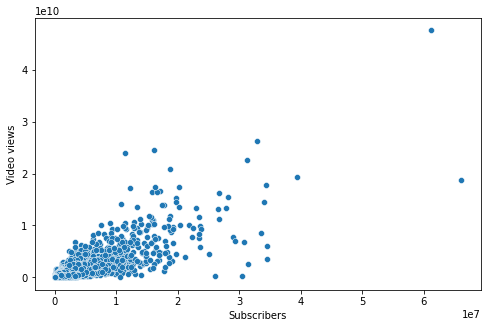

In [146]:
#Does Subscribers Affect Video views Subscribers?

plt.figure(figsize=(8,5))
sns.scatterplot(x="Subscribers",y="Video views",data=data)


In [169]:
#Which Grade Has A Maximum Number of Video Uploads?

data.groupby('Grade')['Video Uploads'].mean().sort_values(ascending=False)

Grade
A++     37450.700000
A+      16960.300000
A        5709.855072
A-       4382.582359
B+       3136.157237
Name: Video Uploads, dtype: float64

<AxesSubplot:xlabel='Grade', ylabel='Video Uploads'>

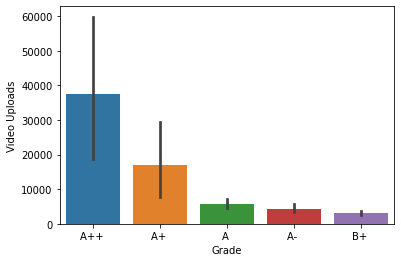

In [160]:
sns.barplot(x='Grade',y='Video Uploads',data=data)

In [148]:
data.columns

Index(['Rank', 'Grade', 'Grade_1', 'Channel name', 'Video Uploads',
       'Subscribers', 'Video views', 'Video views_Avrage'],
      dtype='object')

<AxesSubplot:xlabel='Grade', ylabel='Video views_Avrage'>

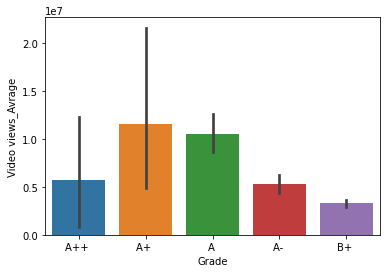

In [161]:
#Which Grade Has The Highest Average Views?
sns.barplot(x='Grade',y='Video views_Avrage',data=data)


In [167]:
data.groupby('Grade')['Video views_Avrage'].mean().sort_values(ascending=False)

Grade
A+      1.157708e+07
A       1.054091e+07
A++     5.688268e+06
A-      5.254804e+06
B+      3.280381e+06
Name: Video views_Avrage, dtype: float64

<AxesSubplot:xlabel='Grade', ylabel='Subscribers'>

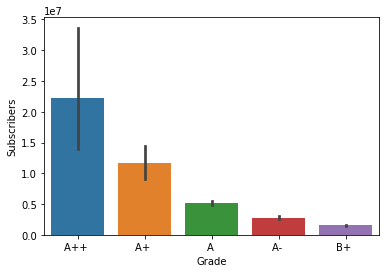

In [164]:
#Which Grade Has The Highest Number of Subscribers?
sns.barplot(x='Grade',y='Subscribers',data=data)

In [170]:
# Which Grade Has The Highest Video Views? 
data.groupby('Grade')['Video views'].mean().sort_values(ascending=False)


Grade
A++     2.119909e+10
A+      6.168742e+09
A       2.497973e+09
A-      1.102450e+09
B+      5.551838e+08
Name: Video views, dtype: float64

<AxesSubplot:xlabel='Grade', ylabel='Video views'>

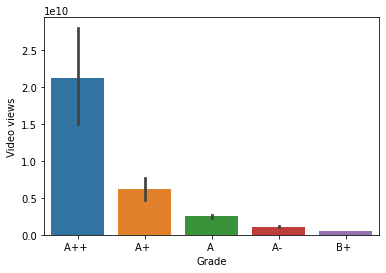

In [171]:
sns.barplot(x='Grade',y='Video views',data=data)